In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf
import joblib

## Supervised
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge

from sklearn.linear_model import LogisticRegression
# Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import xgboost as xgb

## Unsupervised
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

## Semi-Supervised
from sklearn.semi_supervised import LabelSpreading

## Deep Learning
# TensorFlow and Keras
import tensorflow as tf
from tensorflow import keras
# PyTorch
import torch
import torch.nn as nn

# Stardardization and Normalization
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Evaluating Models
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.datasets import load_iris
from imblearn.over_sampling import SMOTE

In [3]:
df = pd.read_csv("marine_engine_data.csv")
df.head()

,timestamp,engine_id,engine_temp,oil_pressure,fuel_consumption,vibration_level,rpm,engine_load,coolant_temp,exhaust_temp,running_period,fuel_consumption_per_hour,maintenance_status,failure_mode,engine_type,fuel_type,manufacturer
0,2023-01-01,ENG_001,79.816406,7.049409,1000.000000,4.366612,1770.214578,42.472407,78.323108,450.0,49.741791,100.0,Critical,Oil Leakage,4-stroke High-Speed,Diesel,MAN B&W
1,2023-01-08,ENG_001,98.982068,8.000000,6308.623817,3.732792,1677.238238,77.042858,100.000000,450.0,94.351515,100.0,Requires Maintenance,Oil Leakage,2-stroke Low-Speed,Diesel,Mitsubishi
2,2023-01-15,ENG_001,83.918153,8.000000,6444.402260,4.061372,1487.472085,63.919637,78.178337,450.0,120.095804,100.0,Normal,No Failure,2-stroke Medium-Speed,Diesel,Caterpillar
3,2023-01-22,ENG_001,81.887081,7.601603,4439.946613,3.999554,1548.624692,55.919509,82.896344,450.0,122.321555,100.0,Requires Maintenance,Mechanical Wear,2-stroke Medium-Speed,Diesel,MAN B&W
4,2023-01-29,ENG_001,78.550429,6.233033,3146.234038,4.520559,1441.151499,29.361118,80.791150,450.0,111.978460,100.0,Normal,No Failure,4-stroke High-Speed,Diesel,Wärtsilä


In [4]:
heatmap_df = df.copy()
heatmap_df.head()

,timestamp,engine_id,engine_temp,oil_pressure,fuel_consumption,vibration_level,rpm,engine_load,coolant_temp,exhaust_temp,running_period,fuel_consumption_per_hour,maintenance_status,failure_mode,engine_type,fuel_type,manufacturer
0,2023-01-01,ENG_001,79.816406,7.049409,1000.000000,4.366612,1770.214578,42.472407,78.323108,450.0,49.741791,100.0,Critical,Oil Leakage,4-stroke High-Speed,Diesel,MAN B&W
1,2023-01-08,ENG_001,98.982068,8.000000,6308.623817,3.732792,1677.238238,77.042858,100.000000,450.0,94.351515,100.0,Requires Maintenance,Oil Leakage,2-stroke Low-Speed,Diesel,Mitsubishi
2,2023-01-15,ENG_001,83.918153,8.000000,6444.402260,4.061372,1487.472085,63.919637,78.178337,450.0,120.095804,100.0,Normal,No Failure,2-stroke Medium-Speed,Diesel,Caterpillar
3,2023-01-22,ENG_001,81.887081,7.601603,4439.946613,3.999554,1548.624692,55.919509,82.896344,450.0,122.321555,100.0,Requires Maintenance,Mechanical Wear,2-stroke Medium-Speed,Diesel,MAN B&W
4,2023-01-29,ENG_001,78.550429,6.233033,3146.234038,4.520559,1441.151499,29.361118,80.791150,450.0,111.978460,100.0,Normal,No Failure,4-stroke High-Speed,Diesel,Wärtsilä


In [5]:
heatmap_df = heatmap_df.drop('timestamp', axis = 1)
heatmap_df = heatmap_df.drop('engine_id', axis = 1)

heatmap_df

,engine_temp,oil_pressure,fuel_consumption,vibration_level,rpm,engine_load,coolant_temp,exhaust_temp,running_period,fuel_consumption_per_hour,maintenance_status,failure_mode,engine_type,fuel_type,manufacturer
0,79.816406,7.049409,1000.000000,4.366612,1770.214578,42.472407,78.323108,450.0,49.741791,100.0,Critical,Oil Leakage,4-stroke High-Speed,Diesel,MAN B&W
1,98.982068,8.000000,6308.623817,3.732792,1677.238238,77.042858,100.000000,450.0,94.351515,100.0,Requires Maintenance,Oil Leakage,2-stroke Low-Speed,Diesel,Mitsubishi
2,83.918153,8.000000,6444.402260,4.061372,1487.472085,63.919637,78.178337,450.0,120.095804,100.0,Normal,No Failure,2-stroke Medium-Speed,Diesel,Caterpillar
3,81.887081,7.601603,4439.946613,3.999554,1548.624692,55.919509,82.896344,450.0,122.321555,100.0,Requires Maintenance,Mechanical Wear,2-stroke Medium-Speed,Diesel,MAN B&W
4,78.550429,6.233033,3146.234038,4.520559,1441.151499,29.361118,80.791150,450.0,111.978460,100.0,Normal,No Failure,4-stroke High-Speed,Diesel,Wärtsilä
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5195,92.745290,7.956103,7680.773408,3.961213,1357.996911,67.879882,93.227957,450.0,109.063800,100.0,Critical,Overheating,2-stroke Medium-Speed,HFO,Caterpillar
5196,89.462079,8.000000,1265.703232,3.895100,1525.999645,64.312763,85.860150,450.0,41.032231,100.0,Normal,Oil Leakage,4-stroke High-Speed,Diesel,MAN B&W
5197,79.057910,6.413932,4052.497442,3.272452,1287.392745,23.827673,82.431163,450.0,151.801942,100.0,Normal,Oil Leakage,4-stroke Medium-Speed,HFO,MAN B&W
5198,79.379851,7.437593,1000.000000,3.450956,1584.249476,43.233388,75.937160,450.0,16.715902,100.0,Critical,Mechanical Wear,2-stroke Medium-Speed,HFO,Rolls-Royce


In [6]:
heatmap_df['maintenance_status'] = heatmap_df['maintenance_status'].replace('Normal', 0)
heatmap_df['maintenance_status'] = heatmap_df['maintenance_status'].replace('Requires Maintenance', 1)
heatmap_df['maintenance_status'] = heatmap_df['maintenance_status'].replace('Critical', 2)

C:\Users\TateC\AppData\Local\Temp\ipykernel_40856\1807521679.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  heatmap_df['maintenance_status'] = heatmap_df['maintenance_status'].replace('Critical', 2)


In [7]:
heatmap_df['failure_code'] = heatmap_df['failure_mode'].copy()

In [8]:
heatmap_df['failure_code'] = heatmap_df['failure_code'].replace('No Failure', 0)
heatmap_df['failure_code'] = heatmap_df['failure_code'].replace('Mechanical Wear', 1)
heatmap_df['failure_code'] = heatmap_df['failure_code'].replace('Oil Leakage', 2)
heatmap_df['failure_code'] = heatmap_df['failure_code'].replace('Overheating', 3)

C:\Users\TateC\AppData\Local\Temp\ipykernel_40856\3563523379.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  heatmap_df['failure_code'] = heatmap_df['failure_code'].replace('Overheating', 3)


In [9]:
heatmap_df['failure_?'] = heatmap_df['failure_mode'].copy()

In [10]:
heatmap_df['failure_?'] = heatmap_df['failure_?'].replace('No Failure', 0)
heatmap_df['failure_?'] = heatmap_df['failure_?'].replace('Mechanical Wear', 1)
heatmap_df['failure_?'] = heatmap_df['failure_?'].replace('Oil Leakage', 1)
heatmap_df['failure_?'] = heatmap_df['failure_?'].replace('Overheating', 1)

C:\Users\TateC\AppData\Local\Temp\ipykernel_40856\4140578988.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  heatmap_df['failure_?'] = heatmap_df['failure_?'].replace('Overheating', 1)


In [11]:
heatmap_df['engine_type'] = heatmap_df['engine_type'].replace('2-stroke Low-Speed', 1)
heatmap_df['engine_type'] = heatmap_df['engine_type'].replace('2-stroke Medium-Speed', 2)
heatmap_df['engine_type'] = heatmap_df['engine_type'].replace('4-stroke Medium-Speed', 3)
heatmap_df['engine_type'] = heatmap_df['engine_type'].replace('4-stroke High-Speed', 4)

C:\Users\TateC\AppData\Local\Temp\ipykernel_40856\1724407335.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  heatmap_df['engine_type'] = heatmap_df['engine_type'].replace('4-stroke High-Speed', 4)


In [12]:
heatmap_df['fuel_type'] = heatmap_df['fuel_type'].replace('Diesel', 0)
heatmap_df['fuel_type'] = heatmap_df['fuel_type'].replace('HFO', 1)

C:\Users\TateC\AppData\Local\Temp\ipykernel_40856\949508105.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  heatmap_df['fuel_type'] = heatmap_df['fuel_type'].replace('HFO', 1)


In [13]:
heatmap_df['manufacturer'] = heatmap_df['manufacturer'].replace('MAN B&W', 1)
heatmap_df['manufacturer'] = heatmap_df['manufacturer'].replace('Yanmar', 2)
heatmap_df['manufacturer'] = heatmap_df['manufacturer'].replace('Rolls-Royce', 3)
heatmap_df['manufacturer'] = heatmap_df['manufacturer'].replace('Wärtsilä', 4)
heatmap_df['manufacturer'] = heatmap_df['manufacturer'].replace('Caterpillar', 5)
heatmap_df['manufacturer'] = heatmap_df['manufacturer'].replace('Mitsubishi', 6)

C:\Users\TateC\AppData\Local\Temp\ipykernel_40856\4052309754.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  heatmap_df['manufacturer'] = heatmap_df['manufacturer'].replace('Mitsubishi', 6)


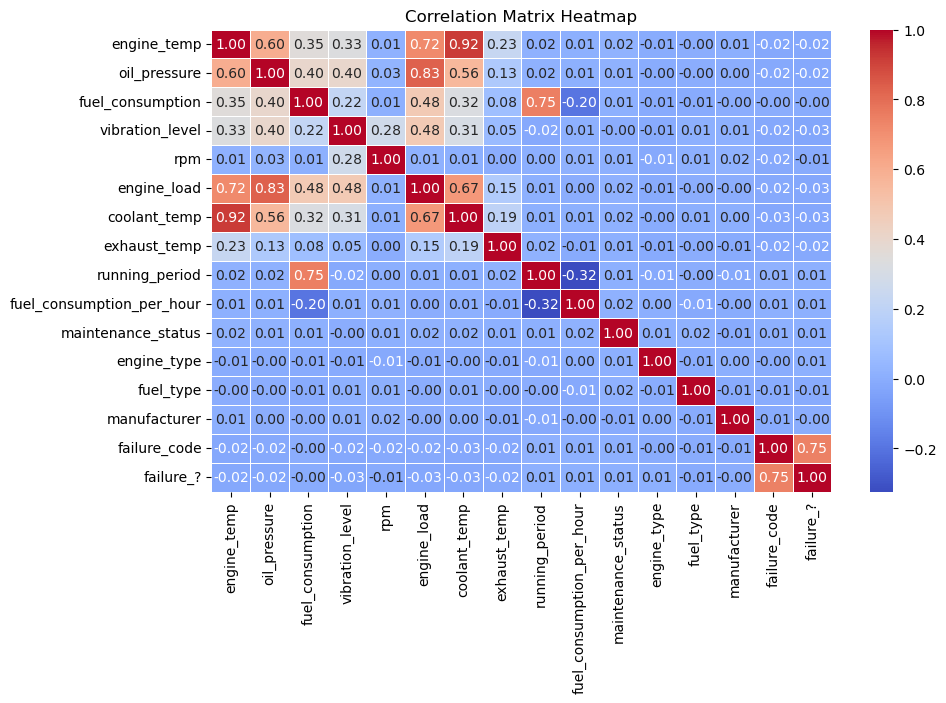

In [14]:
corr_matrix = heatmap_df.corr(numeric_only = True)

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [15]:
heatmap_df.groupby('failure_?').mean(numeric_only=True)

,engine_temp,oil_pressure,fuel_consumption,vibration_level,rpm,engine_load,coolant_temp,exhaust_temp,running_period,fuel_consumption_per_hour,maintenance_status,engine_type,fuel_type,manufacturer,failure_code
failure_?,,,,,,,,,,,,,,,
0,85.384334,7.314855,3961.297091,3.768523,1500.440362,50.758721,85.404800,449.875423,83.003696,114.837141,0.987167,2.676209,0.415597,2.837117,0.000000
1,84.991440,7.273425,3931.959303,3.741264,1496.055743,49.561812,84.902368,449.818335,84.297381,116.616725,1.011703,2.702651,0.404824,2.836398,1.994746


In [16]:
heatmap_df['manufacturer'] = heatmap_df['manufacturer'].replace(1, 'MAN B&W')
heatmap_df['manufacturer'] = heatmap_df['manufacturer'].replace(2, 'Yanmar')
heatmap_df['manufacturer'] = heatmap_df['manufacturer'].replace(3, 'Rolls-Royce')
heatmap_df['manufacturer'] = heatmap_df['manufacturer'].replace(4, 'Wärtsilä')
heatmap_df['manufacturer'] = heatmap_df['manufacturer'].replace(5, 'Caterpillar')
heatmap_df['manufacturer'] = heatmap_df['manufacturer'].replace(6, 'Mitsubishi')

In [17]:
heatmap_df['maintenance_status'] = heatmap_df['maintenance_status'].replace(0, 'Normal')
heatmap_df['maintenance_status'] = heatmap_df['maintenance_status'].replace(1, 'Requires Maintenance')
heatmap_df['maintenance_status'] = heatmap_df['maintenance_status'].replace(2, 'Critical')

In [18]:
heatmap_df['engine_type'] = heatmap_df['engine_type'].replace(1, '2-stroke Low-Speed')
heatmap_df['engine_type'] = heatmap_df['engine_type'].replace(2, '2-stroke Medium-Speed')
heatmap_df['engine_type'] = heatmap_df['engine_type'].replace(3, '4-stroke Medium-Speed')
heatmap_df['engine_type'] = heatmap_df['engine_type'].replace(4, '4-stroke High-Speed')


In [19]:
manufac_count = heatmap_df['manufacturer'].value_counts().sort_index()
manufac_count

manufacturer
Caterpillar     527
MAN B&W        1562
Mitsubishi      513
Rolls-Royce     793
Wärtsilä        743
Yanmar         1062
Name: count, dtype: int64

In [20]:
heatmap_df['fuel_type'] = heatmap_df['fuel_type'].replace(0, 'Diesel')
heatmap_df['fuel_type'] = heatmap_df['fuel_type'].replace(1, 'HFO')

In [21]:
manufac_failure = heatmap_df.groupby('manufacturer')['failure_?'].sum()
manufac_failure

manufacturer
Caterpillar     419
MAN B&W        1257
Mitsubishi      416
Rolls-Royce     646
Wärtsilä        596
Yanmar          853
Name: failure_?, dtype: int64

In [22]:
manufac_failure_df = manufac_failure.reset_index(name='Total_Value')

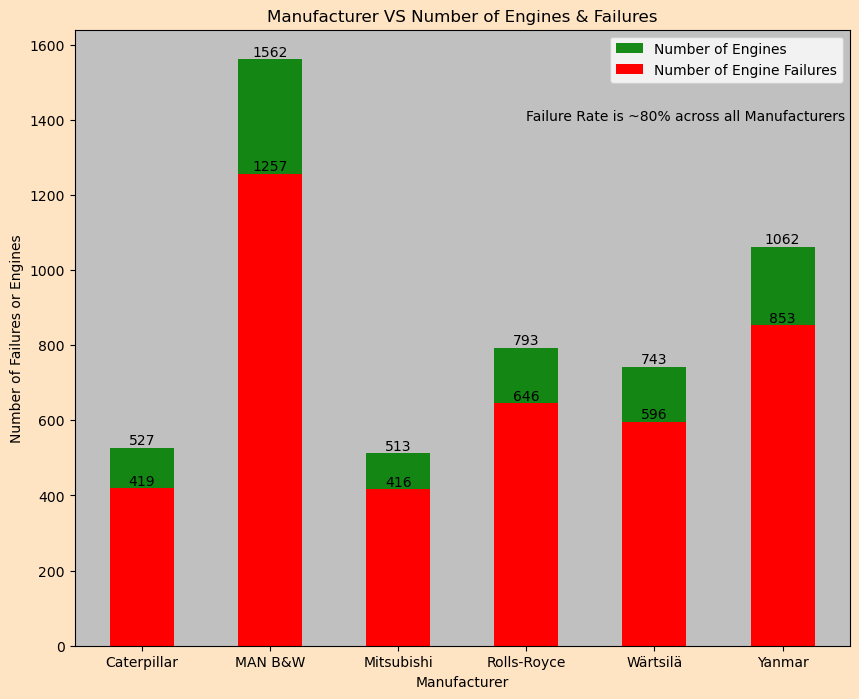

In [23]:
fig, ax = plt.subplots(figsize = (10, 8))

bars = plt.bar(manufac_count.index, manufac_count.values, alpha = 0.9, width = 0.5, color = 'green', label = "Number of Engines")

bars2 = plt.bar(manufac_failure.index, manufac_failure.values, width = 0.5, color = 'red', label = "Number of Engine Failures")

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             '%d' % int(height), ha='center', va='bottom')
    
for bar in bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             '%d' % int(height), ha='center', va='bottom')
    
ax.annotate("Failure Rate is ~80% across all Manufacturers", xy=(3, 1400), xytext=(3, 1400))
      
fig.set_facecolor('bisque')
ax.set_facecolor('silver')
plt.title('Manufacturer VS Number of Engines & Failures')
plt.xlabel('Manufacturer')
plt.ylabel('Number of Failures or Engines')
plt.legend()

Text(0, 0.5, 'Number of Engines')

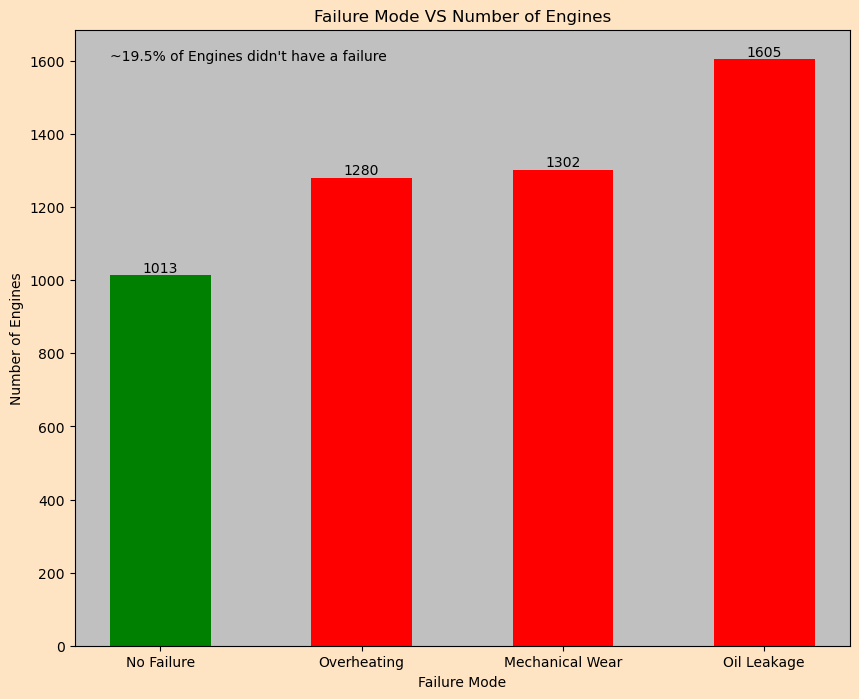

In [24]:
fig, ax = plt.subplots(figsize = (10, 8))

fail_mode = heatmap_df['failure_mode'].value_counts().sort_values()

colors = ['green', 'red', 'red', 'red']

fail_mode_bars = plt.bar(fail_mode.index, fail_mode.values, width = 0.5, color = colors)

for bar in fail_mode_bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             '%d' % int(height), ha='center', va='bottom')
    
ax.annotate("~19.5% of Engines didn't have a failure", xy=(-.25, 1600), xytext=(-.25, 1600))
    
fig.set_facecolor('bisque')
ax.set_facecolor('silver')
plt.title('Failure Mode VS Number of Engines')
plt.xlabel('Failure Mode')
plt.ylabel('Number of Engines')

Text(0, 0.5, 'Number of Engines')

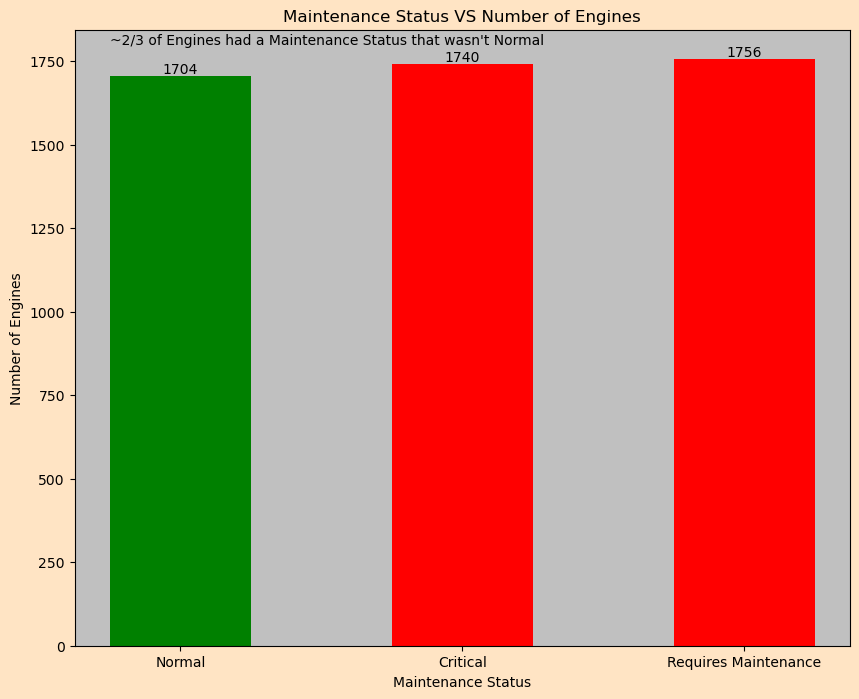

In [25]:
fig, ax = plt.subplots(figsize = (10, 8))

maint_status = heatmap_df['maintenance_status'].value_counts().sort_values()

colors = ['green', 'red', 'red']

maint_status_bars = plt.bar(maint_status.index, maint_status.values, width = 0.5, color = colors)

for bar in maint_status_bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             '%d' % int(height), ha='center', va='bottom')
    
ax.annotate("~2/3 of Engines had a Maintenance Status that wasn't Normal", xy=(-.25, 1800), xytext=(-.25, 1800))
    
fig.set_facecolor('bisque')
ax.set_facecolor('silver')
plt.title('Maintenance Status VS Number of Engines')
plt.xlabel('Maintenance Status')
plt.ylabel('Number of Engines')

Text(0, 0.5, 'Number of Engines')

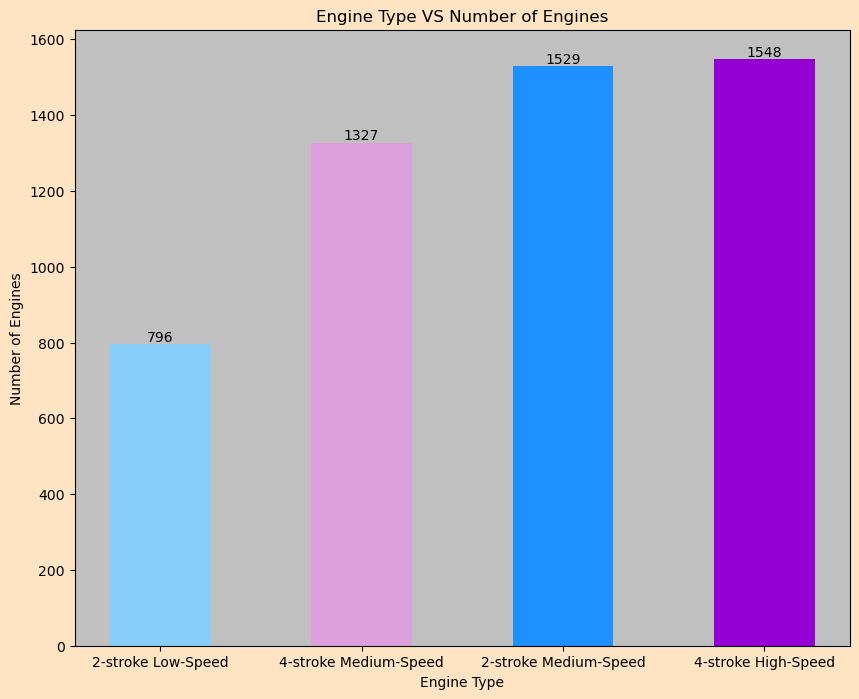

In [26]:
fig, ax = plt.subplots(figsize = (10, 8))

engine_type = heatmap_df['engine_type'].value_counts().sort_values()

colors = ['lightskyblue', 'plum', 'dodgerblue', 'darkviolet']

engine_type_bars = plt.bar(engine_type.index, engine_type.values, width = 0.5, color = colors)

for bar in engine_type_bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             '%d' % int(height), ha='center', va='bottom')
    
ax.annotate("~2/3 of Engines had a Maintenance Status that wasn't Normal", xy=(-.25, 1800), xytext=(-.25, 1800))
    
fig.set_facecolor('bisque')
ax.set_facecolor('silver')
plt.title('Engine Type VS Number of Engines')
plt.xlabel('Engine Type')
plt.ylabel('Number of Engines')

Text(0, 0.5, 'Number of Engines')

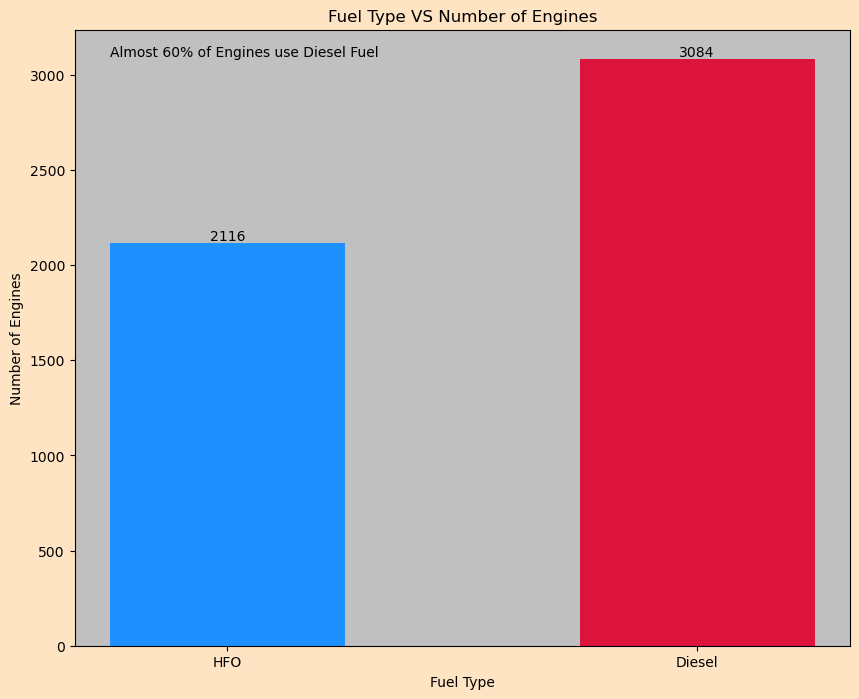

In [27]:
fig, ax = plt.subplots(figsize = (10, 8))

fuel_type = heatmap_df['fuel_type'].value_counts().sort_values()

colors = ['dodgerblue', 'crimson']

fuel_type_bars = plt.bar(fuel_type.index, fuel_type.values, width = 0.5, color = colors)

for bar in fuel_type_bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             '%d' % int(height), ha='center', va='bottom')
    
ax.annotate("Almost 60% of Engines use Diesel Fuel", xy=(-.25, 3100), xytext=(-.25, 3100))
    
fig.set_facecolor('bisque')
ax.set_facecolor('silver')
plt.title('Fuel Type VS Number of Engines')
plt.xlabel('Fuel Type')
plt.ylabel('Number of Engines')

Text(0.5, 1.0, 'Time of Engine Running (Hours) VS Fuel Consumption per Week')

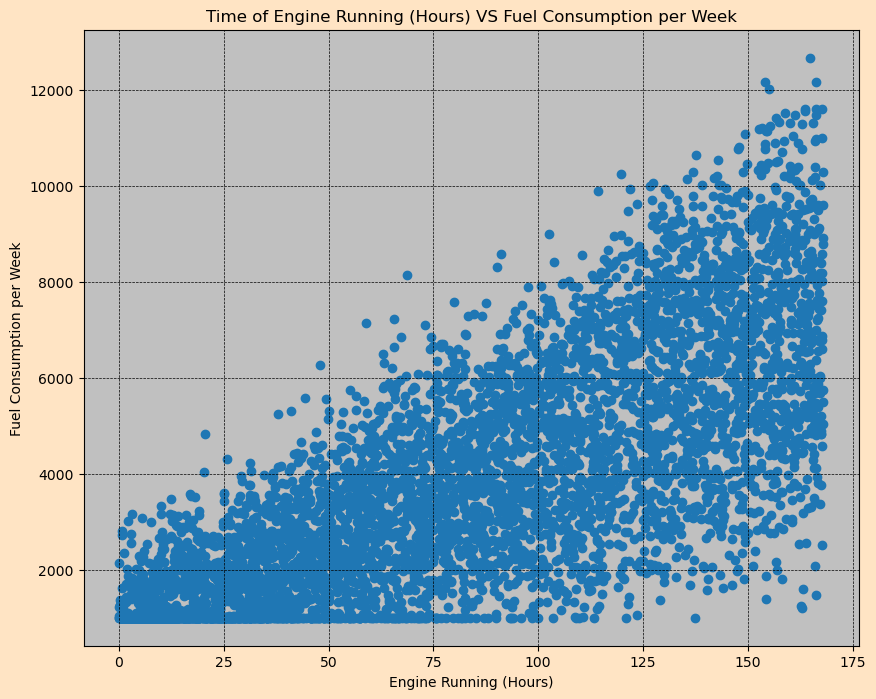

In [28]:
fig, ax = plt.subplots(figsize = (10, 8))

plt.scatter(heatmap_df['running_period'], heatmap_df['fuel_consumption'])

fig.set_facecolor('bisque')
ax.set_facecolor('silver')
plt.xlabel("Engine Running (Hours)")
plt.ylabel("Fuel Consumption per Week")
plt.grid(True, color = 'black', linestyle = '--', linewidth = 0.5)
plt.title("Time of Engine Running (Hours) VS Fuel Consumption per Week")

Text(0.5, 1.0, 'Time of Engine Running (Hours) VS Fuel Consumption per Hour')

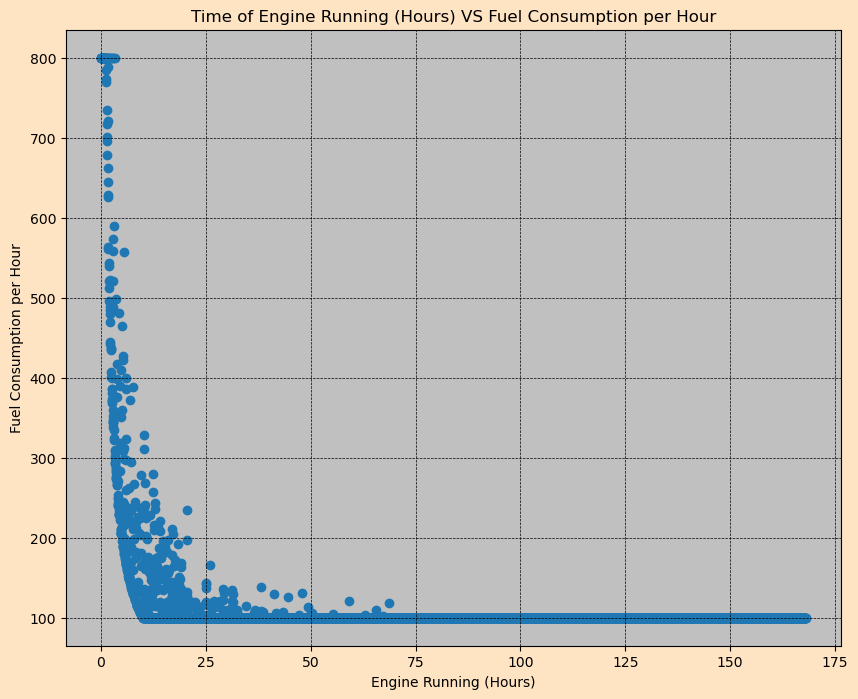

In [29]:
fig, ax = plt.subplots(figsize = (10, 8))

plt.scatter(heatmap_df['running_period'], heatmap_df['fuel_consumption_per_hour'])

fig.set_facecolor('bisque')
ax.set_facecolor('silver')
plt.xlabel("Engine Running (Hours)")
plt.ylabel("Fuel Consumption per Hour")
plt.grid(True, color = 'black', linestyle = '--', linewidth = 0.5)
plt.title("Time of Engine Running (Hours) VS Fuel Consumption per Hour")

Text(0.5, 1.0, 'Fuel Consumption per Week VS Fuel Consumption per Hour')

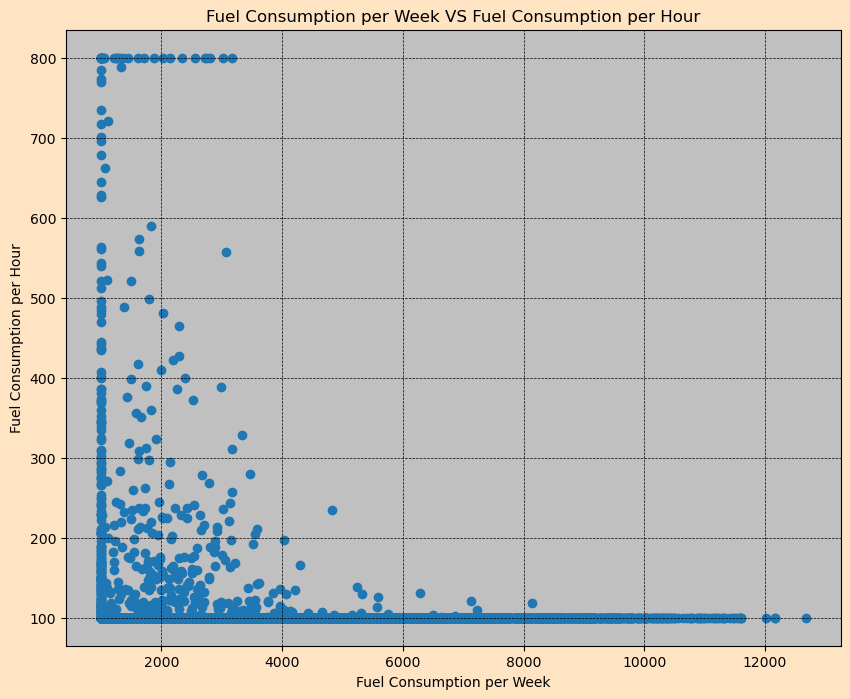

In [30]:
fig, ax = plt.subplots(figsize = (10, 8))

plt.scatter(heatmap_df['fuel_consumption'], heatmap_df['fuel_consumption_per_hour'])

fig.set_facecolor('bisque')
ax.set_facecolor('silver')
plt.xlabel("Fuel Consumption per Week")
plt.ylabel("Fuel Consumption per Hour")
plt.grid(True, color = 'black', linestyle = '--', linewidth = 0.5)
plt.title("Fuel Consumption per Week VS Fuel Consumption per Hour")

Text(0.5, 1.0, 'Engine Load (Percent Engine is Working at) VS Coolant Temperature (Celsius)')

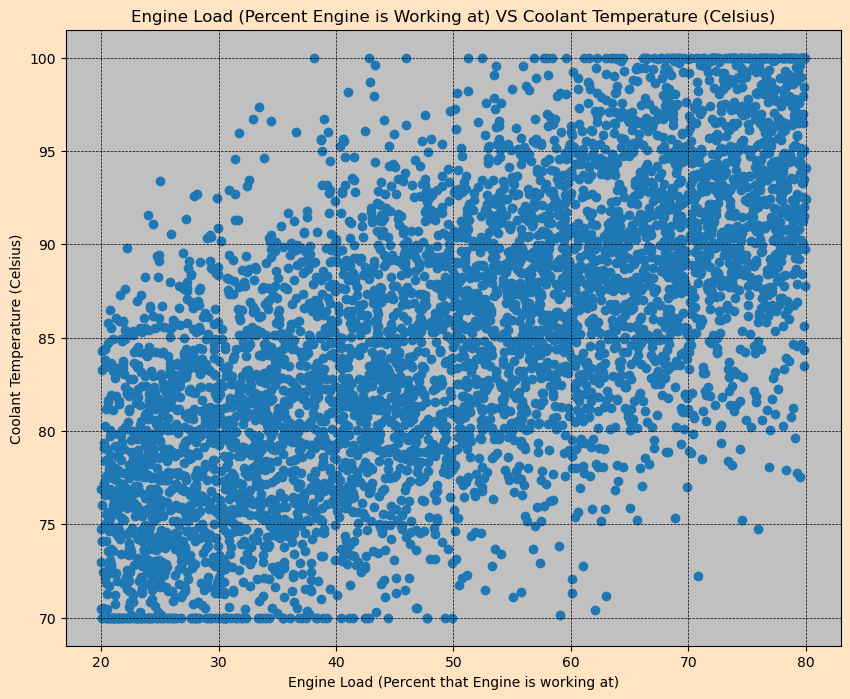

In [31]:
fig, ax = plt.subplots(figsize = (10, 8))

plt.scatter(heatmap_df['engine_load'], heatmap_df['coolant_temp'])

fig.set_facecolor('bisque')
ax.set_facecolor('silver')
plt.xlabel("Engine Load (Percent that Engine is working at)")
plt.ylabel("Coolant Temperature (Celsius)")
plt.grid(True, color = 'black', linestyle = '--', linewidth = 0.5)
plt.title("Engine Load (Percent Engine is Working at) VS Coolant Temperature (Celsius)")

Text(0.5, 1.0, 'Engine Load (Percent Engine is Working at) VS Vibration Level')

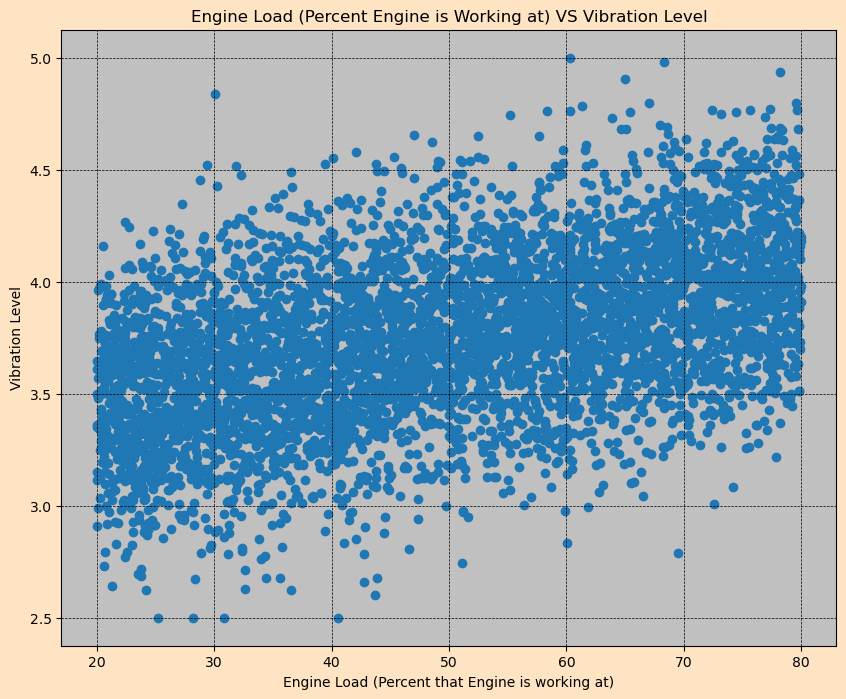

In [32]:
fig, ax = plt.subplots(figsize = (10, 8))

plt.scatter(heatmap_df['engine_load'], heatmap_df['vibration_level'])

fig.set_facecolor('bisque')
ax.set_facecolor('silver')
plt.xlabel("Engine Load (Percent that Engine is working at)")
plt.ylabel("Vibration Level")
plt.grid(True, color = 'black', linestyle = '--', linewidth = 0.5)
plt.title("Engine Load (Percent Engine is Working at) VS Vibration Level")

Text(0.5, 1.0, 'Engine Load (Percent Engine is Working at) VS Fuel Consumption per Week')

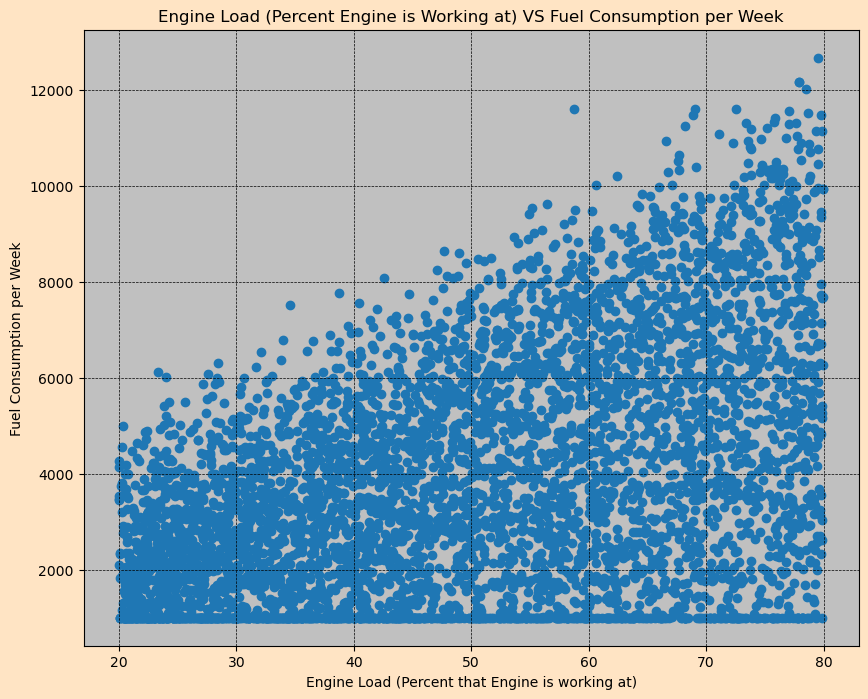

In [33]:
fig, ax = plt.subplots(figsize = (10, 8))

plt.scatter(heatmap_df['engine_load'], heatmap_df['fuel_consumption'])

fig.set_facecolor('bisque')
ax.set_facecolor('silver')
plt.xlabel("Engine Load (Percent that Engine is working at)")
plt.ylabel("Fuel Consumption per Week")
plt.grid(True, color = 'black', linestyle = '--', linewidth = 0.5)
plt.title("Engine Load (Percent Engine is Working at) VS Fuel Consumption per Week")

Text(0.5, 1.0, 'Engine Load (Percent Engine is Working at) VS Oil Pressure')

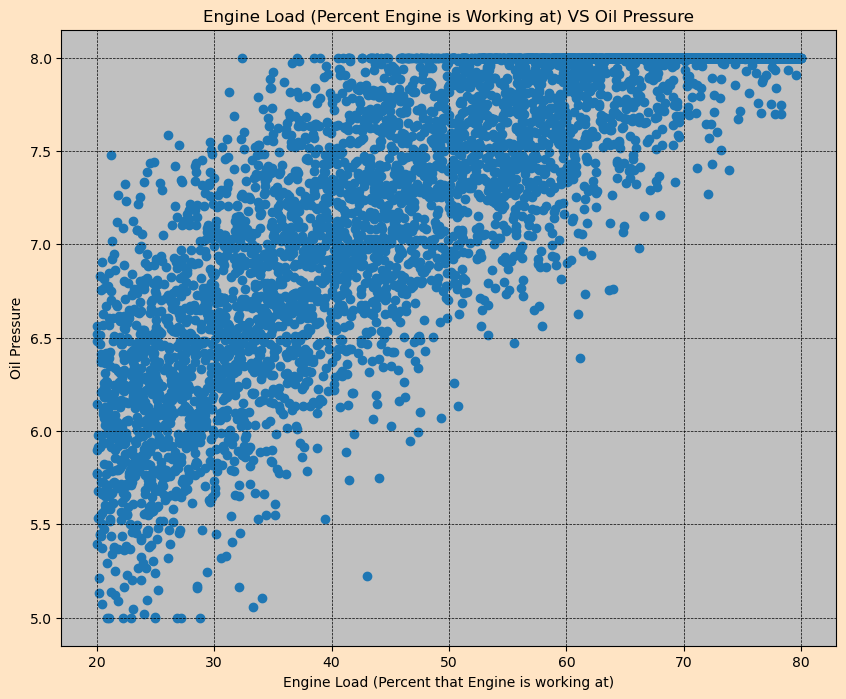

In [34]:
fig, ax = plt.subplots(figsize = (10, 8))

plt.scatter(heatmap_df['engine_load'], heatmap_df['oil_pressure'])

fig.set_facecolor('bisque')
ax.set_facecolor('silver')
plt.xlabel("Engine Load (Percent that Engine is working at)")
plt.ylabel("Oil Pressure")
plt.grid(True, color = 'black', linestyle = '--', linewidth = 0.5)
plt.title("Engine Load (Percent Engine is Working at) VS Oil Pressure")

Text(0.5, 1.0, 'Engine Load (Percent Engine is Working at) VS Engine Temperature')

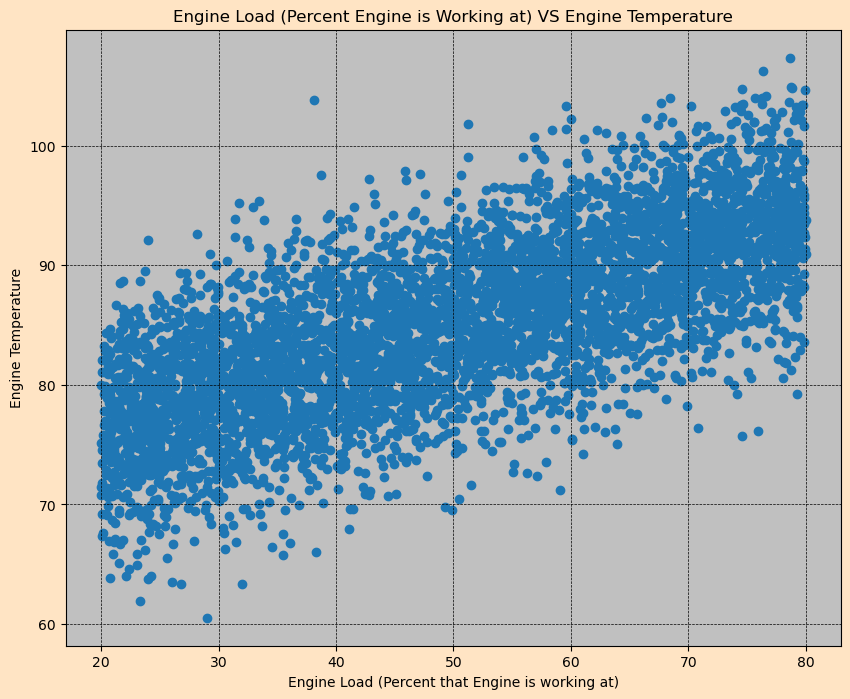

In [35]:
fig, ax = plt.subplots(figsize = (10, 8))

plt.scatter(heatmap_df['engine_load'], heatmap_df['engine_temp'])

fig.set_facecolor('bisque')
ax.set_facecolor('silver')
plt.xlabel("Engine Load (Percent that Engine is working at)")
plt.ylabel("Engine Temperature")
plt.grid(True, color = 'black', linestyle = '--', linewidth = 0.5)
plt.title("Engine Load (Percent Engine is Working at) VS Engine Temperature")

Text(0.5, 1.0, 'Oil Pressure VS Coolant Temperature')

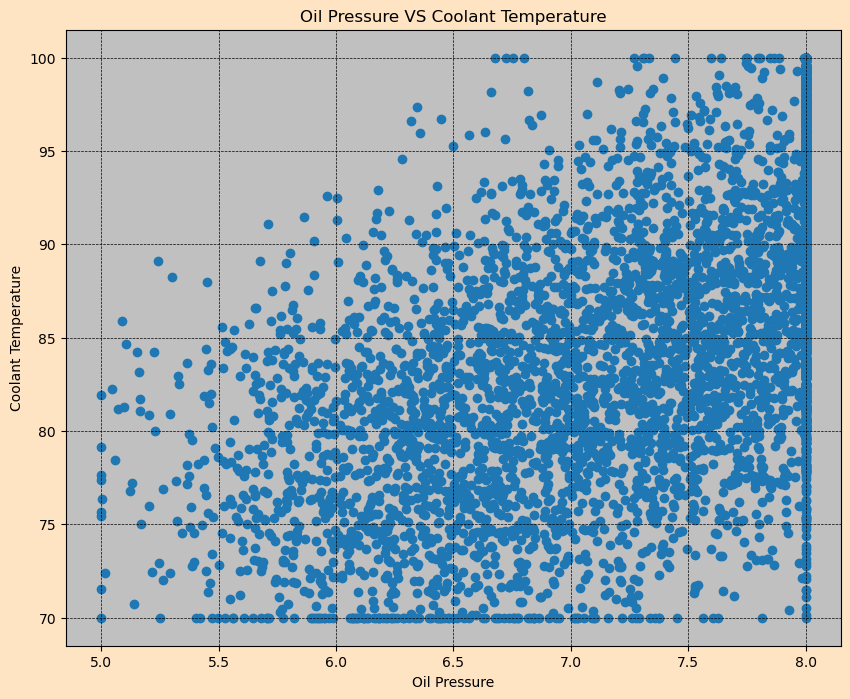

In [36]:
fig, ax = plt.subplots(figsize = (10, 8))

plt.scatter(heatmap_df['oil_pressure'], heatmap_df['coolant_temp'])

fig.set_facecolor('bisque')
ax.set_facecolor('silver')
plt.xlabel("Oil Pressure")
plt.ylabel("Coolant Temperature")
plt.grid(True, color = 'black', linestyle = '--', linewidth = 0.5)
plt.title("Oil Pressure VS Coolant Temperature")

Text(0.5, 1.0, 'Engine Temperature VS Coolant Temperature')

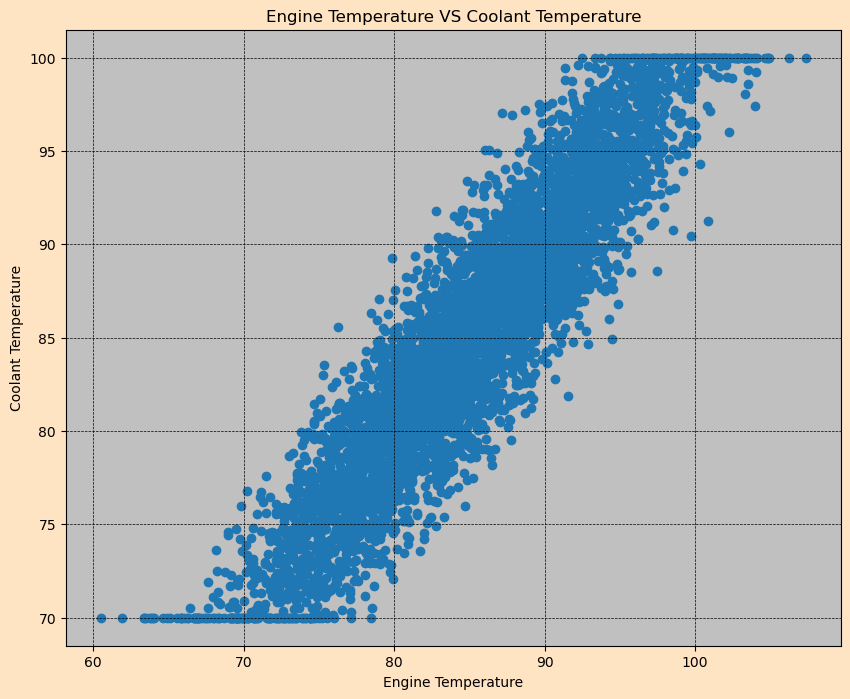

In [37]:
fig, ax = plt.subplots(figsize = (10, 8))

plt.scatter(heatmap_df['engine_temp'], heatmap_df['coolant_temp'])

fig.set_facecolor('bisque')
ax.set_facecolor('silver')
plt.xlabel("Engine Temperature")
plt.ylabel("Coolant Temperature")
plt.grid(True, color = 'black', linestyle = '--', linewidth = 0.5)
plt.title("Engine Temperature VS Coolant Temperature")

Text(0.5, 1.0, 'Vibration Level VS Oil Pressure')

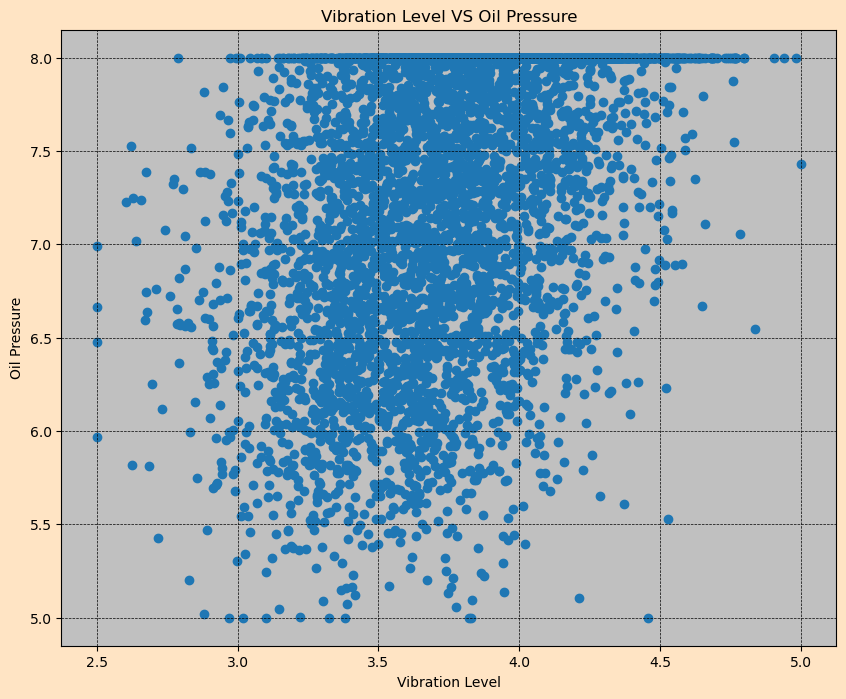

In [38]:
fig, ax = plt.subplots(figsize = (10, 8))

plt.scatter(heatmap_df['vibration_level'], heatmap_df['oil_pressure'])

fig.set_facecolor('bisque')
ax.set_facecolor('silver')
plt.xlabel("Vibration Level")
plt.ylabel("Oil Pressure")
plt.grid(True, color = 'black', linestyle = '--', linewidth = 0.5)
plt.title("Vibration Level VS Oil Pressure")

Text(0.5, 1.0, 'Oil Pressure VS Fuel Consumption per Week')

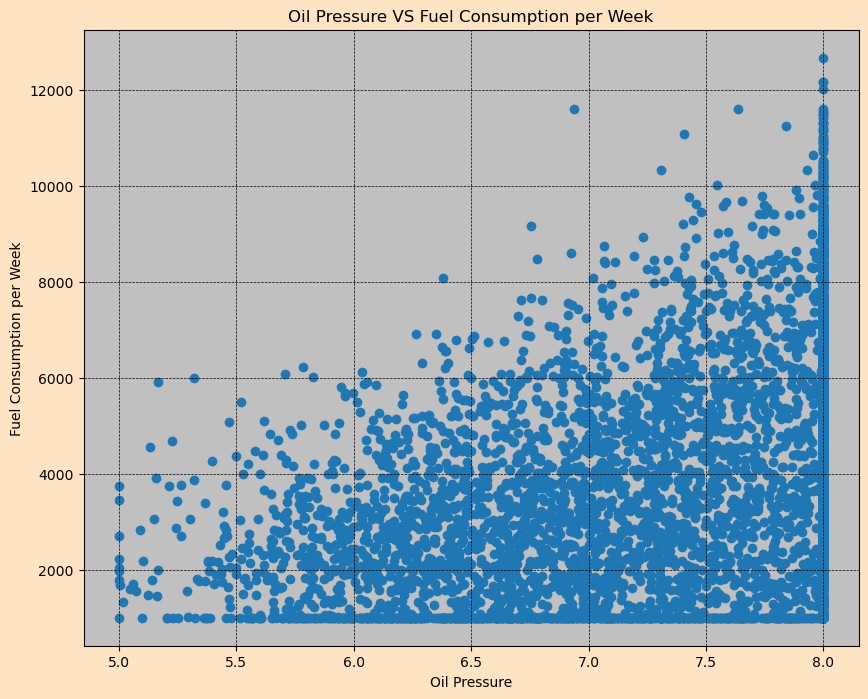

In [39]:
fig, ax = plt.subplots(figsize = (10, 8))

plt.scatter(heatmap_df['oil_pressure'], heatmap_df['fuel_consumption'])

fig.set_facecolor('bisque')
ax.set_facecolor('silver')
plt.xlabel("Oil Pressure")
plt.ylabel("Fuel Consumption per Week")
plt.grid(True, color = 'black', linestyle = '--', linewidth = 0.5)
plt.title("Oil Pressure VS Fuel Consumption per Week")

Text(0.5, 1.0, 'Oil Pressure VS Engine Temperature')

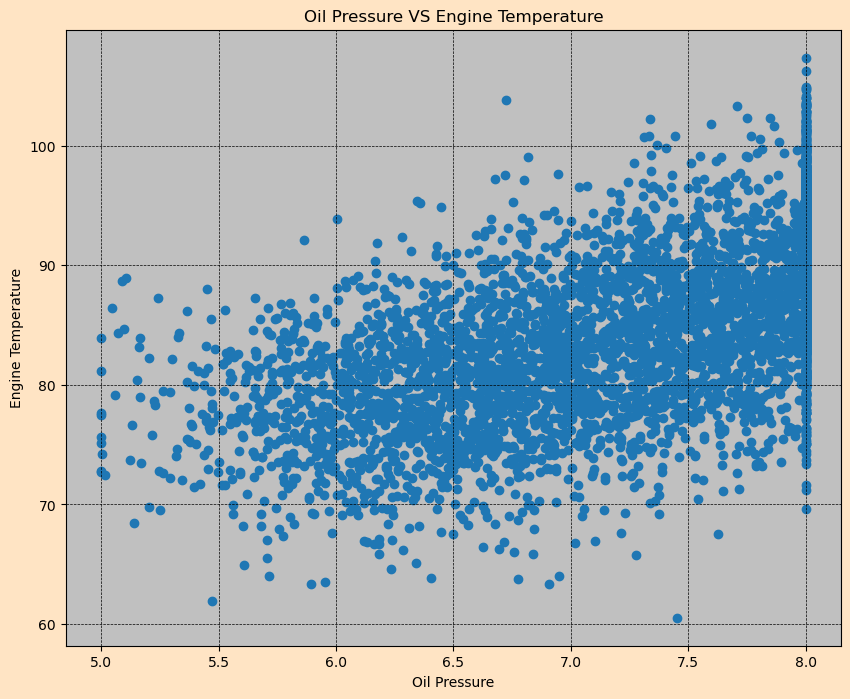

In [40]:
fig, ax = plt.subplots(figsize = (10, 8))

plt.scatter(heatmap_df['oil_pressure'], heatmap_df['engine_temp'])

fig.set_facecolor('bisque')
ax.set_facecolor('silver')
plt.xlabel("Oil Pressure")
plt.ylabel("Engine Temperature")
plt.grid(True, color = 'black', linestyle = '--', linewidth = 0.5)
plt.title("Oil Pressure VS Engine Temperature")

In [41]:
# Specify columns to be dummified
columns_to_dummify = ['engine_type', 'fuel_type', 'manufacturer']

# Apply get_dummies and concatenate with original DataFrame
df_with_dummies = pd.concat([heatmap_df, pd.get_dummies(heatmap_df[columns_to_dummify])], axis=1)

# Optionally drop the original columns that were dummified
df_final = df_with_dummies.drop(columns=columns_to_dummify, axis=1)

In [42]:
df_final = df_final.drop(['failure_code'], axis = 1)

In [43]:
y = df_final['maintenance_status']
X = df_final.drop(['failure_?', 'failure_mode', 'maintenance_status'], axis = 1)

In [44]:
X.rename(columns={'engine_type_2-stroke Low-Speed': 'engine_type_2_stroke_Low_Speed'}, inplace=True)
X.rename(columns={'engine_type_2-stroke Medium-Speed': 'engine_type_2_stroke_Medium_Speed'}, inplace=True)
X.rename(columns={'engine_type_4-stroke High-Speed': 'engine_type_4_stroke_High_Speed'}, inplace=True)
X.rename(columns={'engine_type_4-stroke Medium-Speed': 'engine_type_4_stroke_Medium_Speed'}, inplace=True)
X.rename(columns={'manufacturer_MAN B&W': 'manufacturer_MAN_B_W'}, inplace=True)
X.rename(columns={'manufacturer_Rolls-Royce': 'manufacturer_Rolls_Royce'}, inplace=True)
X.rename(columns={'manufacturer_Wärtsilä': 'manufacturer_Wartsila'}, inplace=True)

In [45]:
y = y.values
y = y.flatten()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42, stratify=y)

In [46]:
smote = SMOTE()
X_train_SMOTE, y_train_SMOTE = smote.fit_resample(X_train, y_train)

In [47]:
lab_enc_maint_status = LabelEncoder()
encoded_y_train = lab_enc_maint_status.fit_transform(y_train_SMOTE)

In [48]:
forest_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")
forest_model.fit(X_train_SMOTE, encoded_y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [49]:
y_pred = forest_model.predict(X_test)

In [50]:
y_decoded_pred = lab_enc_maint_status.inverse_transform(y_pred)

y_decoded_pred[0]

'Normal'

In [51]:
list(y_decoded_pred)

['Normal',
 'Requires Maintenance',
 'Normal',
 'Requires Maintenance',
 'Normal',
 'Requires Maintenance',
 'Normal',
 'Critical',
 'Critical',
 'Requires Maintenance',
 'Normal',
 'Normal',
 'Critical',
 'Critical',
 'Critical',
 'Normal',
 'Critical',
 'Critical',
 'Requires Maintenance',
 'Requires Maintenance',
 'Requires Maintenance',
 'Normal',
 'Normal',
 'Critical',
 'Critical',
 'Critical',
 'Critical',
 'Normal',
 'Normal',
 'Normal',
 'Requires Maintenance',
 'Critical',
 'Requires Maintenance',
 'Normal',
 'Normal',
 'Requires Maintenance',
 'Normal',
 'Normal',
 'Requires Maintenance',
 'Normal',
 'Critical',
 'Critical',
 'Requires Maintenance',
 'Critical',
 'Normal',
 'Requires Maintenance',
 'Requires Maintenance',
 'Requires Maintenance',
 'Requires Maintenance',
 'Critical',
 'Normal',
 'Critical',
 'Critical',
 'Normal',
 'Critical',
 'Critical',
 'Critical',
 'Requires Maintenance',
 'Normal',
 'Requires Maintenance',
 'Requires Maintenance',
 'Requires Maintenanc

In [52]:
# accuracy = forest_model.score(X_test, y_test)
# print("Model accuracy:", accuracy)

accuracy_score1 = accuracy_score(y_test, y_decoded_pred)
print("Accuracy Score: ", accuracy_score1)

# precision = precision_score(y_test, y_decoded_pred)
# print("Precision Score: ", precision)

# recall = recall_score(y_test, y_decoded_pred)
# print("Recall Score: ", recall)

# f1 = f1_score(y_test, y_decoded_pred)
# print("F1 Score: ", f1)

# r2 = r2_score(y_test, y_decoded_pred)
# print("R2 Score: ", r2)

Accuracy Score:  0.3346153846153846


In [53]:
# Commented out because the files have already been created.

# joblib.dump(forest_model, 'forest_model_maint_status.joblib')
# joblib.dump(lab_enc_maint_status, 'lab_enc_maint_status.joblib')

In [54]:
# Feature importance random forest

importances_forest = forest_model.feature_importances_

# Put feature importance into a DataFrame
feature_importance_forest = pd.DataFrame({
    'feature': X.columns,
    'importance': importances_forest
}).sort_values(by='importance', ascending=False)

print(feature_importance_forest)

                              feature  importance
3                     vibration_level    0.109554
4                                 rpm    0.108568
8                      running_period    0.107199
5                         engine_load    0.105653
0                         engine_temp    0.104667
6                        coolant_temp    0.104184
2                    fuel_consumption    0.099467
1                        oil_pressure    0.080499
12    engine_type_4_stroke_High_Speed    0.015998
9           fuel_consumption_per_hour    0.015936
15                      fuel_type_HFO    0.015895
11  engine_type_2_stroke_Medium_Speed    0.015718
14                   fuel_type_Diesel    0.014908
13  engine_type_4_stroke_Medium_Speed    0.014802
17               manufacturer_MAN_B_W    0.013696
21                manufacturer_Yanmar    0.012918
19           manufacturer_Rolls_Royce    0.012284
20              manufacturer_Wartsila    0.011582
10     engine_type_2_stroke_Low_Speed    0.011353


Text(0.5, 1.0, 'Feature Importances')

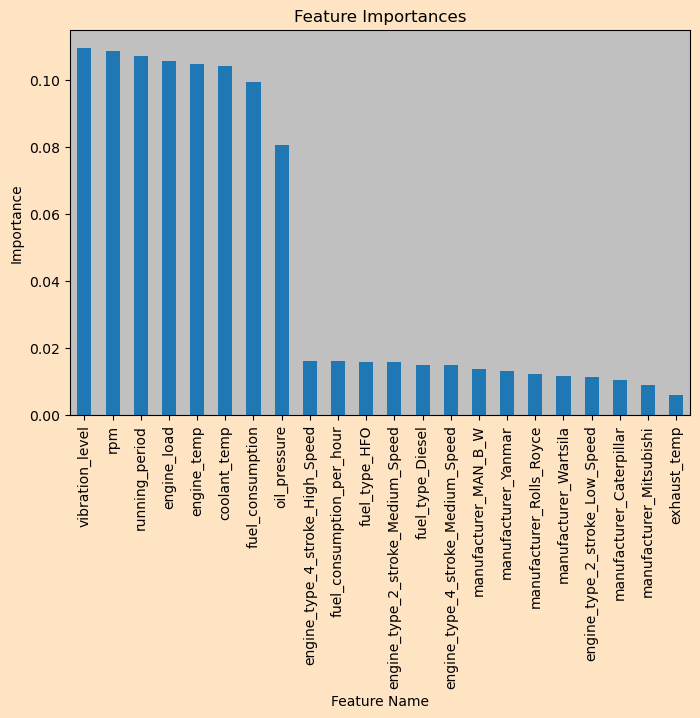

In [86]:
feature_importances = pd.Series(importances_forest, index=X.columns)

fig, ax = plt.subplots(figsize = (8, 5))

feature_importances.sort_values(ascending=False).plot(kind='bar')

fig.set_facecolor("bisque")
ax.set_facecolor("silver")
plt.xlabel("Feature Name")
plt.ylabel("Importance")
plt.title("Feature Importances")